In [ ]:
# pip install pingouin

In [55]:
import pandas as pd
from sklearn import preprocessing
import pingouin as pg
import numpy as np
from scipy import stats,integrate
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

### Data preprocess (Calculating normalized video clip index & plot sentence index)

In [56]:
# Import all (ML&manually extracted) events data from 3 movies
all_500_df = pd.read_csv('All_Events_500Days.csv')
all_tsn_df = pd.read_csv('All_Event_TSN.csv')
all_flight_df = pd.read_csv('All_Event_Flight.csv')

In [57]:
# Collect all manually extracted events data
manual_500_df = all_500_df.loc[all_500_df['ExtractionType']=='Manually Extracted Event']
manual_tsn_df = all_tsn_df.loc[all_tsn_df['ExtractionType']=='Manually Extracted Event']
manual_flight_df = all_flight_df.loc[all_flight_df['ExtractionType']=='Manually Extracted Event']

In [58]:
# drop0: remove the annotation sentences which were not alligned with clips in the movie
manual_500_df_drop0 = manual_500_df[manual_500_df['EndTime(s)'] != 0]
manual_tsn_df_drop0 = manual_tsn_df[manual_tsn_df['EndTime(s)'] != 0]
manual_flight_df_drop0 = manual_flight_df[manual_flight_df['EndTime(s)'] != 0]

In [59]:
# Utilize MinMaxScaler method to get the Normalised Video Clip Index and Plot Sentence Index
scaler = preprocessing.MinMaxScaler()

manual_500_df_drop0['Normalised Video Clip Index'] = scaler.fit_transform(manual_500_df_drop0[['StartTime(s)']])
manual_500_df_drop0['Normalised Plot Sentence Index'] = scaler.fit_transform(manual_500_df_drop0[['start_point']])

manual_tsn_df_drop0['Normalised Video Clip Index'] = scaler.fit_transform(manual_tsn_df_drop0[['StartTime(s)']])
manual_tsn_df_drop0['Normalised Plot Sentence Index'] = scaler.fit_transform(manual_tsn_df_drop0[['start_point']])

manual_flight_df_drop0['Normalised Video Clip Index'] = scaler.fit_transform(manual_flight_df_drop0[['StartTime(s)']])
manual_flight_df_drop0['Normalised Plot Sentence Index'] = scaler.fit_transform(manual_flight_df_drop0[['start_point']])

/var/folders/hf/q7z4q65s6_15prrzvsr4c0vh0000gn/T/ipykernel_40839/2953387587.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manual_500_df_drop0['Normalised Video Clip Index'] = scaler.fit_transform(manual_500_df_drop0[['StartTime(s)']])
/var/folders/hf/q7z4q65s6_15prrzvsr4c0vh0000gn/T/ipykernel_40839/2953387587.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manual_500_df_drop0['Normalised Plot Sentence Index'] = scaler.fit_transform(manual_500_df_drop0[['start_point']])
/var/folders/hf/q7z4q65s6_15

In [7]:
# Save Normalised Video Clip Index and Normalised Plot Sentence Index data
manual_500_df_drop0.to_csv('anno_500_index.csv', index=False)
manual_tsn_df_drop0.to_csv('anno_tsn_index.csv', index=False)
manual_flight_df_drop0.to_csv('anno_flight_index.csv', index=False)

### Plot coverage visualisation(Utilize normalised plot sentence index and video clip index)

#### 500 Days of Summer(2009)

In [60]:
# Perform linear regression to obtain the slope coefficient (b), intercept, r-value, p-value, and std_err
x_data_500 = np.array(manual_500_df_drop0["Normalised Plot Sentence Index"])
y_data_500 = np.array(manual_500_df_drop0["Normalised Video Clip Index"])
slope_500, intercept_500, r_value_500, p_value_500, std_err_500 = linregress(x_data_500, y_data_500)
linear_regression_formula = f"y = {slope_500:.2f}x + {intercept_500:.2f}"

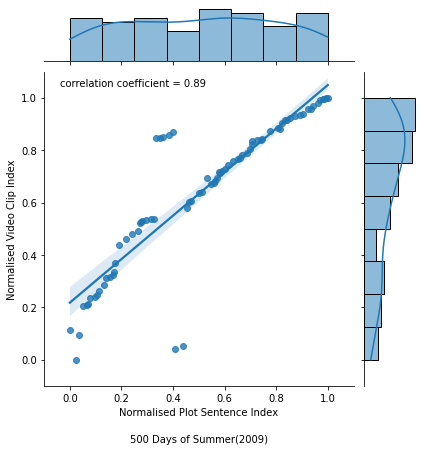

<Figure size 3000x2000 with 0 Axes>

In [133]:
# plot jointplot
# Normalised plot sentence index as x variable and normalised video clip index as y variable
figure_height = 6
plot = sns.jointplot(manual_500_df_drop0, x="Normalised Plot Sentence Index", y="Normalised Video Clip Index", kind='reg',
                    height=figure_height, xlim=(-0.1, 1.1), ylim=(-0.1, 1.1), color="#1f77b4")

plt.title("500 Days of Summer(2009)", fontsize=10, y=-0.20)

plt.text(0.05, 0.98, f'correlation coefficient = {r_value_500:.2f}', transform=plot.ax_joint.transAxes, fontsize=10, va='top')

plt.figure(dpi=500);

#### The Social Network(2010)

In [62]:
# Perform linear regression to obtain the slope coefficient (b), intercept, r-value, p-value, and std_err
x_data_tsn = np.array(manual_tsn_df_drop0["Normalised Plot Sentence Index"])
y_data_tsn = np.array(manual_tsn_df_drop0["Normalised Video Clip Index"])
slope_tsn, intercept_tsn, r_value_tsn, p_value_tsn, std_err_tsn = linregress(x_data_tsn, y_data_tsn)
linear_regression_formula = f"y = {slope_tsn:.2f}x + {intercept_tsn:.2f}"

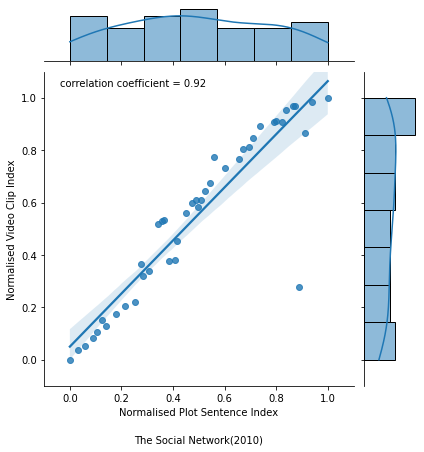

<Figure size 3000x2000 with 0 Axes>

In [134]:
# plot jointplot
# normalised plot sentence index as x variable and normalised video clip index as y variable
figure_height = 6
plot =sns.jointplot(manual_tsn_df_drop0, x="Normalised Plot Sentence Index", y="Normalised Video Clip Index", kind='reg', height=figure_height, xlim=(-0.1, 1.1), ylim=(-0.1, 1.1), color="#1f77b4")

plt.title("The Social Network(2010)", fontsize=10, y=-0.20)

plt.text(0.05, 0.98, f'correlation coefficient = {r_value_tsn:.2f}', transform=plot.ax_joint.transAxes, fontsize=10, va='top')

plt.figure(dpi=500);

#### Flight(2012)


In [64]:
# Perform linear regression to obtain the slope coefficient (b), intercept, r-value, p-value, and std_err
x_data_flight = np.array(manual_flight_df_drop0["Normalised Plot Sentence Index"])
y_data_flight = np.array(manual_flight_df_drop0["Normalised Video Clip Index"])
slope_flight, intercept_flight, r_value_flight, p_value_flight, std_err_flight = linregress(x_data_flight, y_data_flight)
linear_regression_formula = f"y = {slope_flight:.2f}x + {intercept_flight:.2f}"

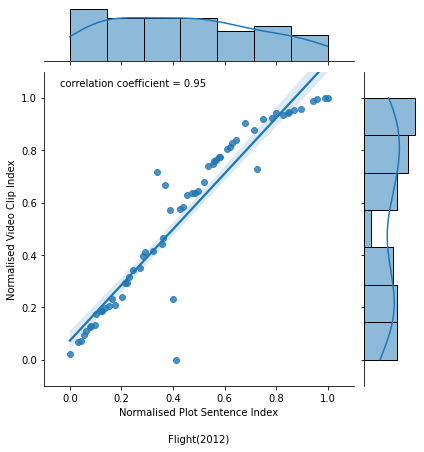

<Figure size 3000x2000 with 0 Axes>

In [135]:
# plot jointplot
# normalised plot sentence index as x variable and normalised video clip index as y variable
figure_height = 6
plot =sns.jointplot(manual_flight_df_drop0, x="Normalised Plot Sentence Index", y="Normalised Video Clip Index", kind='reg', height=figure_height, xlim=(-0.1, 1.1), ylim=(-0.1, 1.1), color="#1f77b4")

plt.title("Flight(2012)", fontsize=10, y=-0.20)

plt.text(0.05, 0.98, f'correlation coefficient = {r_value_flight:.2f}', transform=plot.ax_joint.transAxes, fontsize=10, va='top')

plt.figure(dpi=500);

### Cumulative distribution plot(combining data from 3 movies)


In [66]:
# Combine 3 dataframes of 3 movies
df = pd.concat([manual_500_df_drop0, manual_tsn_df_drop0, manual_flight_df_drop0])

In [67]:
# Perform linear regression to obtain the slope coefficient (b), intercept, r-value, p-value, and std_err
x_data_3 = np.array(df["Normalised Plot Sentence Index"])
y_data_3 = np.array(df["Normalised Video Clip Index"])
slope_3, intercept_3, r_value_3, p_value_3, std_err_3 = linregress(x_data_3, y_data_3)

linear_regression_formula = f"y = {slope_3:.2f}x + {intercept_3:.2f}"

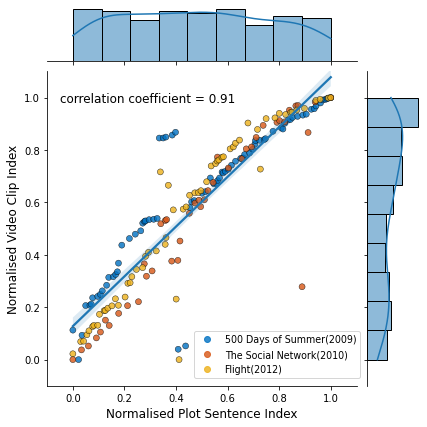

<Figure size 3000x2000 with 0 Axes>

In [129]:
figure_height = 6
# Plot cumulative distribution plot
g = sns.JointGrid(data=df, x="Normalised Plot Sentence Index", y="Normalised Video Clip Index", height=figure_height, xlim=(-0.1, 1.1), ylim=(-0.1, 1.1))
g.ax_joint.set_xlabel("Normalised Plot Sentence Index", fontsize=12)  
g.ax_joint.set_ylabel("Normalised Video Clip Index", fontsize=12)  
legend_labels = df["MovieName"].unique()
colors = {"500 Days of Summer(2009)": "#0071c2", "The Social Network(2010)": "#d75615", "Flight(2012)": "#edb11a"}
colors_legend= ["#0071c2", "#d75615", "#edb11a"]

# Traverse each movie and draw the corresponding scatterplot
for i, movie_name in enumerate(df["MovieName"].unique()):
    movie_data = df[df["MovieName"] == movie_name]
    sns.scatterplot(data=movie_data, x="Normalised Plot Sentence Index", y="Normalised Video Clip Index",
                    hue="MovieName", ax=g.ax_joint, palette=colors, alpha=0.8, edgecolor="black")

# Add regression lines for all data
sns.regplot(data=df, x="Normalised Plot Sentence Index", y="Normalised Video Clip Index", scatter=False, ax=g.ax_joint, color="#1f77b4")
ax = g.ax_joint

plt.text(0.05, 1.15, f'correlation coefficient = {r_value_3:.2f}', transform=plot.ax_joint.transAxes, fontsize=12, va='top')

# Manually create a legend with the correct symbols
legend_handles = [plt.Line2D([], [], linestyle='None', marker='o', label=label, color=colors_legend[i], alpha=0.8,)
                  for i, label in enumerate(legend_labels)]

# Add legend
ax.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(0.46, 0.1), prop={'size': 9.5}, borderpad = 0.4)

# Plot marginal plot
sns.histplot(data=df, x="Normalised Plot Sentence Index", ax=g.ax_marg_x, color="#1f77b4", kde=True)
sns.histplot(data=df, y="Normalised Video Clip Index", ax=g.ax_marg_y, color="#1f77b4", kde=True, orientation="horizontal")

plt.figure(dpi=500);